In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
air_quality = pd.read_csv("/content/drive/My Drive/Project_Air_Quality_Prediction.csv", sep=";", decimal=",")

We will use the AirQualityUCI.csv file as our dataset. It is a ';' seperated file so we'll specify it as a parameter for the read_csv function.

In [ ]:
air_quality.dropna(axis=0, how= 'all', inplace=True)
air_quality.dropna(axis=1, inplace=True)

The data contains null values. So we drop those rows and columns containing null values.

In [ ]:
air_quality.replace(to_replace= -200, value= np.NaN, inplace= True)
air_quality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


The data contains missing values which are represented by the value -200 so we'll replace these values by the null value(np.NaN).

In [ ]:
air_quality.fillna(air_quality.mean(), inplace= True)

<ipython-input-6-f6d19ce35d04>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  air_quality.fillna(air_quality.mean(), inplace= True)


Here we'll replace these null values by the mean value of the row.

<Axes: >

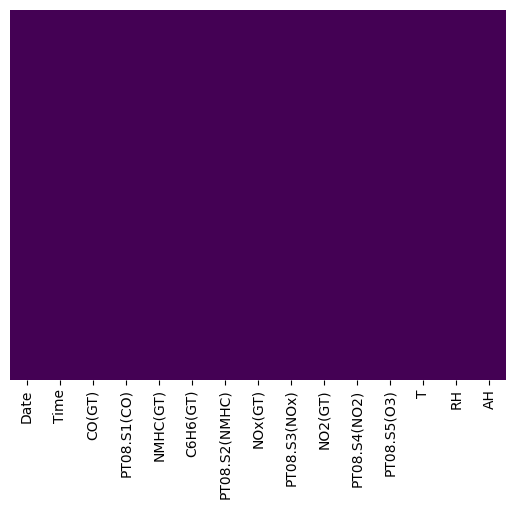

In [ ]:
snc.heatmap(air_quality.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
air_quality.loc[:,'Date']=air_quality['Date']
air_quality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


For "Date", convert string values to datetime data type, and store them in list "Date"

In [ ]:
from datetime import datetime
Date= []
for i in air_quality['Date']:
    Date.append(datetime.strptime(i,'%d/%m/%Y'))
air_quality.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [ ]:
date=pd.Series(Date)
air_quality['Date']=pd.to_numeric(date)

Convert Date list to series, and use it as the index of data

In [ ]:
air_quality['Date']=air_quality['Date'].astype(float)
air_quality.dtypes

Date             float64
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

Displaying the datatypes of all the features.

In [ ]:
air_quality.loc[:,'Time']=air_quality['Time']

For "Time", convert string values to datetime data type, and store them in list "Time"

In [ ]:
from datetime import datetime
Time= []
for i in air_quality['Time']:
    Time.append(datetime.strptime(i,'%H.%M.%S'))
air_quality.dtypes

Date             float64
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [ ]:
time=pd.Series(Time)
air_quality['Time']=pd.to_numeric(time)

Convert Time list to series, and use it as the index of data

In [ ]:
air_quality['Time']=air_quality['Time'].astype(float)
air_quality.dtypes

Date             float64
Time             float64
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

Displaying the datatypes of all the features.

In [ ]:
air_quality.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,1.112573e+18,-2.208953e+18,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,1.112573e+18,-2.208949e+18,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,1.112573e+18,-2.208946e+18,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,1.112573e+18,-2.208942e+18,2.1,1003.0,218.811816,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,1.112573e+18,-2.208938e+18,2.2,1071.0,218.811816,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
num = air_quality.keys()
scaler = MinMaxScaler()
scaler.fit(air_quality[num])
air_quality[num] = scaler.transform(air_quality[num])

Here feature scaling is done to transform raw data into a standardized dataset so that so that they fall in a specific range of values. MinMaxScaler is used which transforms the data in the range between 0 and 1. 

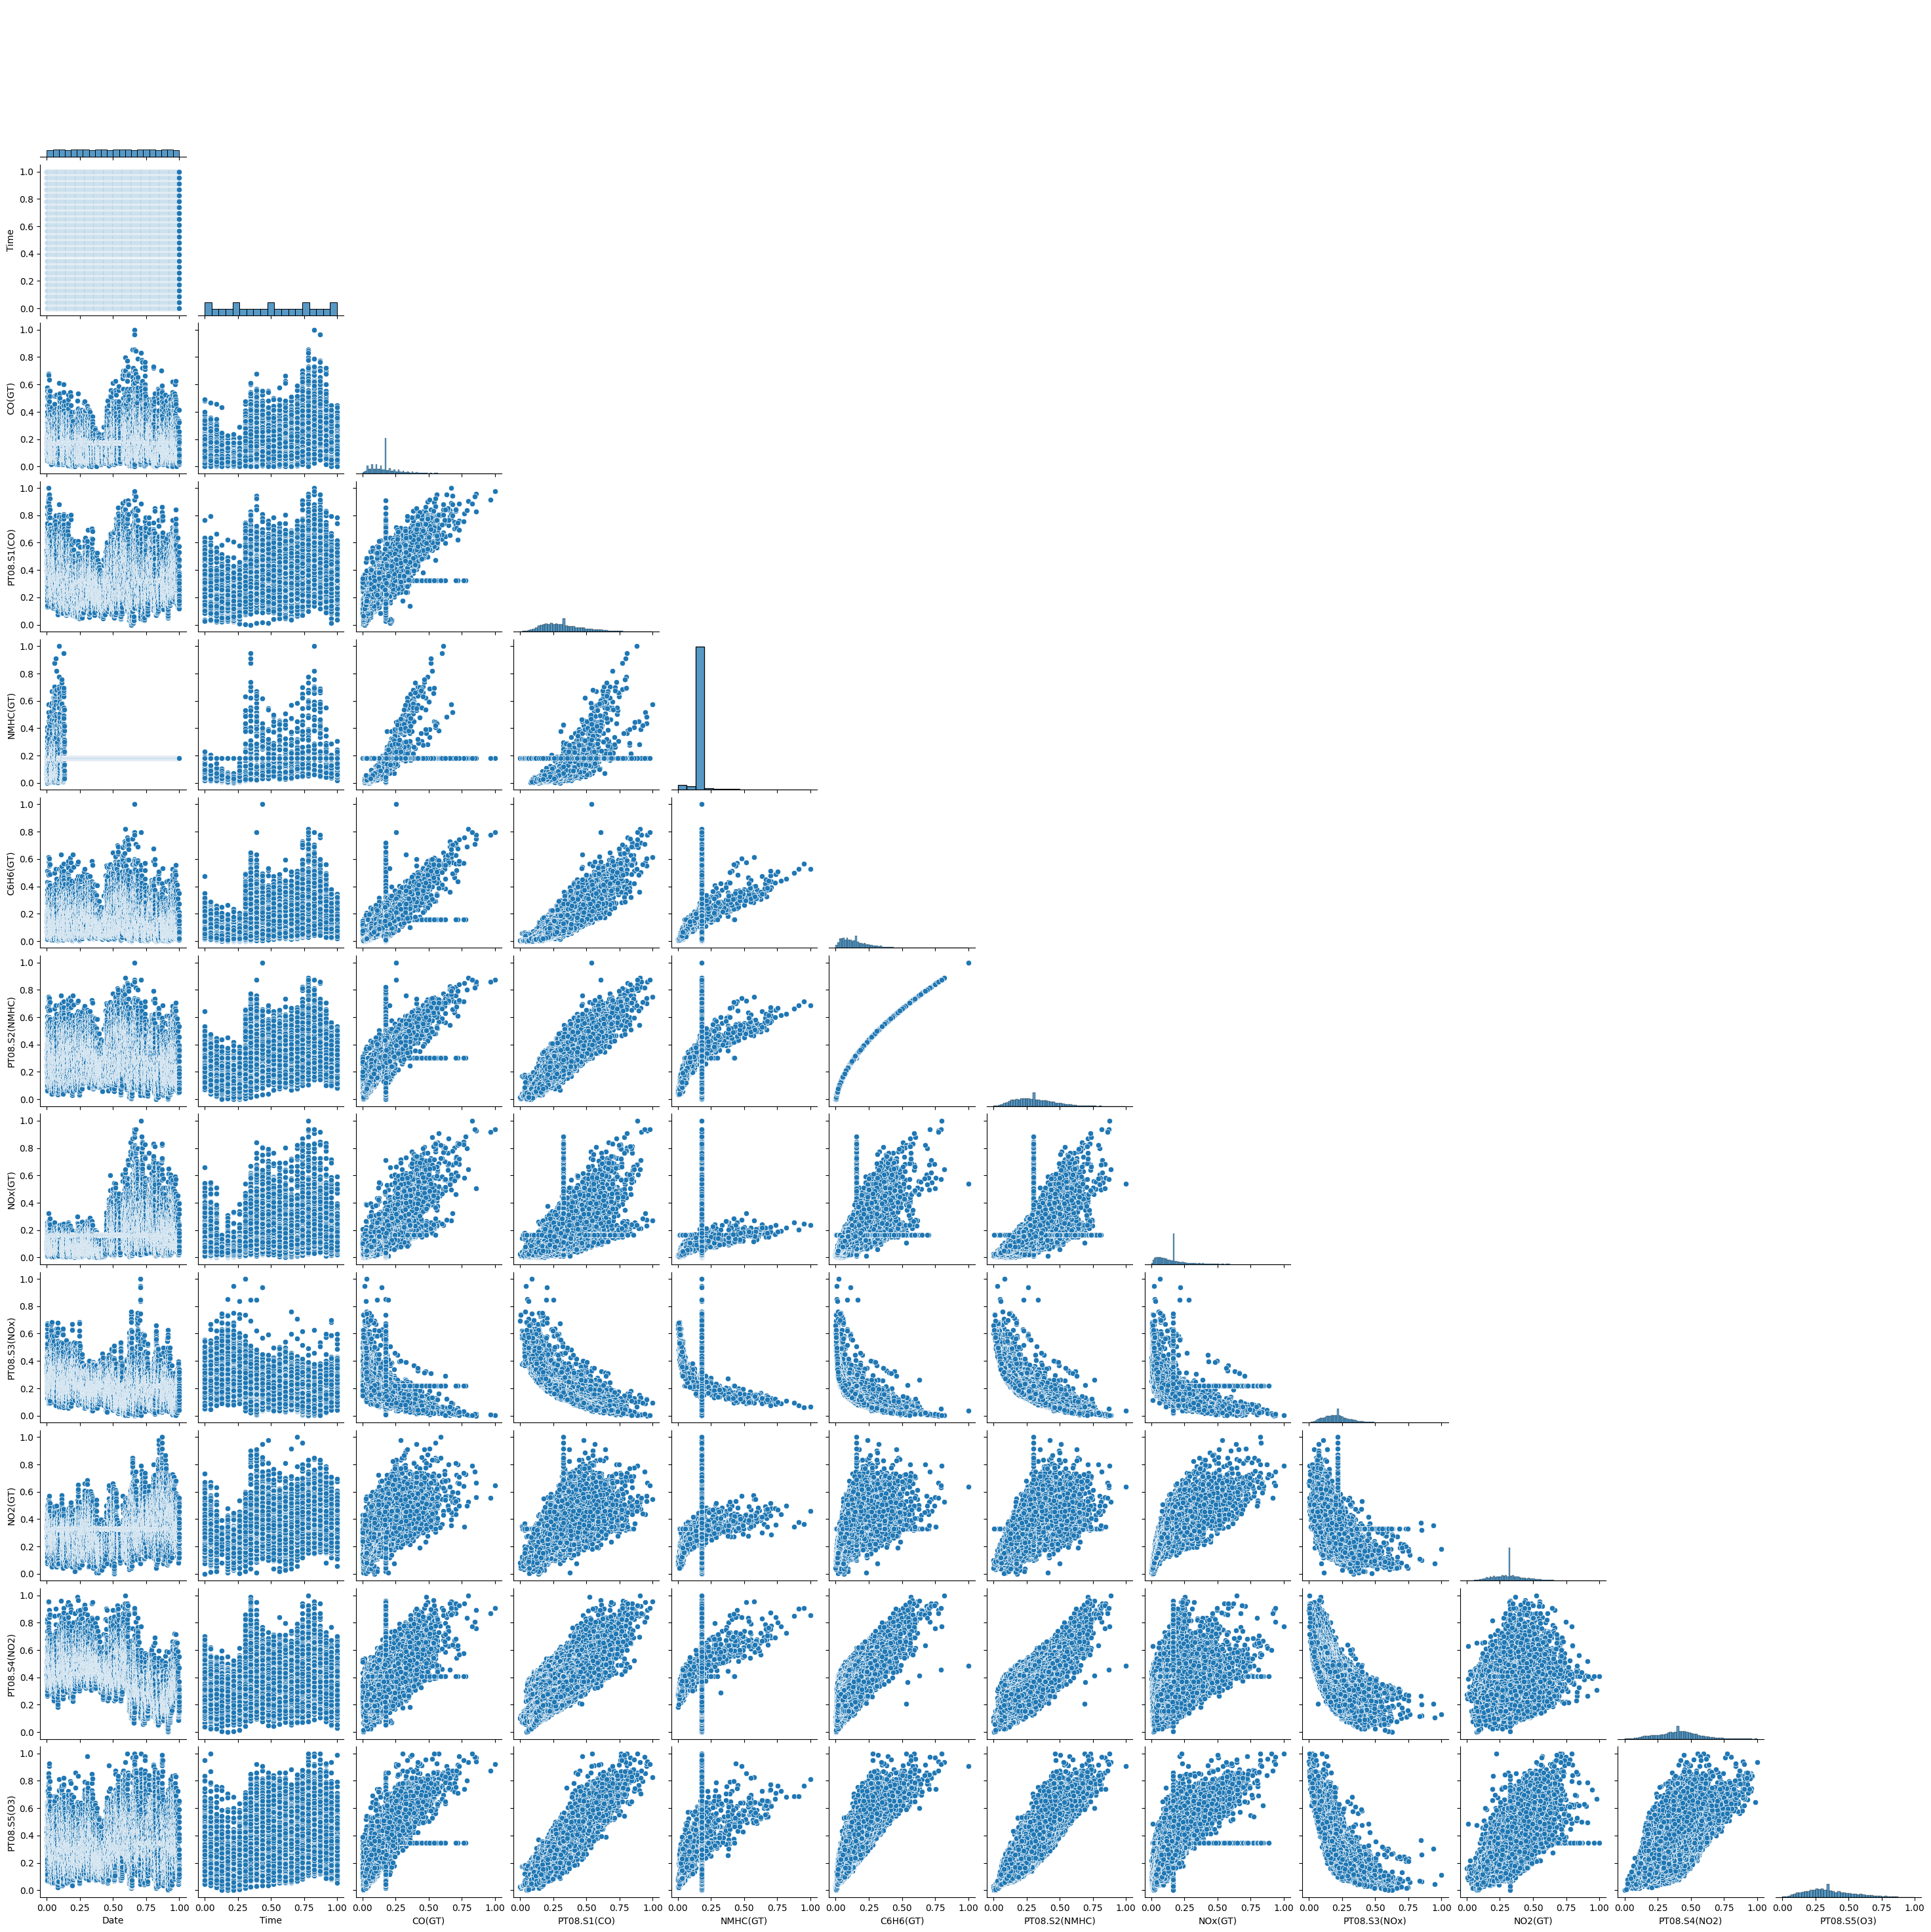

In [ ]:
snc.pairplot(air_quality[["Date","Time","CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)","PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)"]],diag_kind = "auto", corner=True)

Visualizing the data using pair plots to determine whether the data is linear. 

In [ ]:
features=air_quality
target=air_quality['T']

Computing the features.
Computing the target by selecting the target as T because T is an independent feature which can be used to predict the values of various other features affecting the air quality.

In [ ]:
air_quality2=air_quality.corr('pearson')
air_quality2

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,1.000000,-0.003249,0.041514,-0.003232,0.008010,-0.064007,-0.083633,0.401280,-0.251775,0.349315,-0.517637,0.103508,-0.450032,0.212245,-0.310146
Time,-0.003249,1.000000,0.323944,0.321097,0.102758,0.336890,0.380964,0.200493,-0.316828,0.327673,0.216572,0.239880,0.202272,-0.289543,-0.018233
CO(GT),0.041514,0.323944,1.000000,0.773394,0.289975,0.812361,0.795578,0.762273,-0.613877,0.646349,0.558232,0.759027,0.020257,0.043198,0.043274
PT08.S1(CO),-0.003232,0.321097,0.773394,1.000000,0.278282,0.883795,0.892964,0.615941,-0.771938,0.562843,0.682881,0.899324,0.048627,0.114606,0.135324
NMHC(GT),0.008010,0.102758,0.289975,0.278282,1.000000,0.281928,0.279761,0.098180,-0.261997,0.156510,0.232979,0.240592,0.066782,-0.052784,0.037173
C6H6(GT),-0.064007,0.336890,0.812361,0.883795,0.281928,1.000000,0.981950,0.616801,-0.735744,0.535919,0.765731,0.865689,0.198956,-0.061681,0.167972
PT08.S2(NMHC),-0.083633,0.380964,0.795578,0.892964,0.279761,0.981950,1.000000,0.601773,-0.796703,0.561180,0.777254,0.880578,0.241373,-0.090380,0.186933
NOx(GT),0.401280,0.200493,0.762273,0.615941,0.098180,0.616801,0.601773,1.000000,-0.563270,0.763074,0.205485,0.688205,-0.235636,0.192587,-0.126868
PT08.S3(NOx),-0.251775,-0.316828,-0.613877,-0.771938,-0.261997,-0.735744,-0.796703,-0.563270,1.000000,-0.569479,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017
NO2(GT),0.349315,0.327673,0.646349,0.562843,0.156510,0.535919,0.561180,0.763074,-0.569479,1.000000,0.140655,0.629443,-0.165466,-0.080569,-0.291392


Using the Pearson correlation to find out what features contribute most to predicting our target. 

In [ ]:
abs(air_quality2['T']).sort_values(ascending=False)

T                1.000000
AH               0.656397
RH               0.578621
PT08.S4(NO2)     0.561270
Date             0.450032
PT08.S2(NMHC)    0.241373
NOx(GT)          0.235636
Time             0.202272
C6H6(GT)         0.198956
NO2(GT)          0.165466
PT08.S3(NOx)     0.145112
NMHC(GT)         0.066782
PT08.S1(CO)      0.048627
PT08.S5(O3)      0.027172
CO(GT)           0.020257
Name: T, dtype: float64

<Axes: >

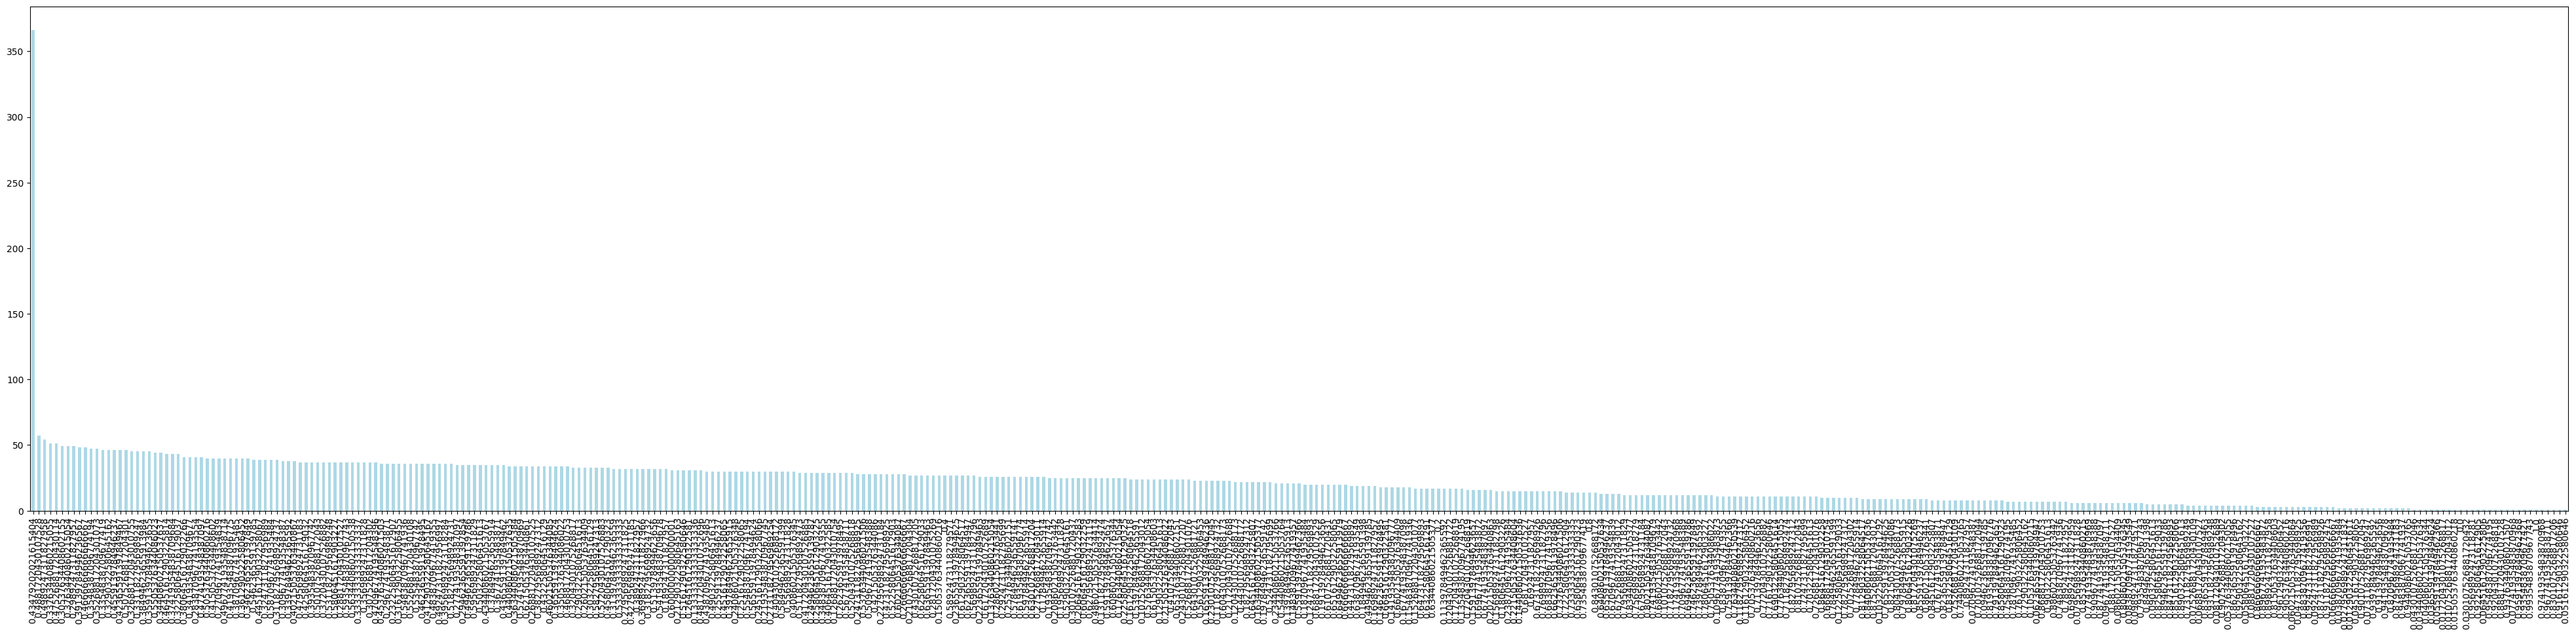

In [ ]:
air_quality['T'].value_counts().plot(kind='bar', color='lightblue', figsize=(50,10))

Plotting the counts of unique values of the target.

In [ ]:
features=features.drop('Date',axis=1)
features=features.drop('Time',axis=1)
features=features.drop('T',axis=1)
features=features.drop('CO(GT)',axis=1)
features=features.drop('PT08.S5(O3)',axis=1)
features=features.drop('NMHC(GT)',axis=1)
features=features.drop('PT08.S1(CO)',axis=1)
features.tail()

,C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),RH,AH
9352,0.210692,0.392135,0.318213,0.091910,0.556213,0.370054,0.252830,0.279578
9353,0.177673,0.351720,0.237644,0.119441,0.523669,0.320594,0.182390,0.257636
9354,0.193396,0.371382,0.197021,0.119017,0.511834,0.310252,0.114465,0.222792
9355,0.147799,0.315674,0.157752,0.160949,0.455621,0.220324,0.054088,0.160876
9356,0.185535,0.362643,0.178064,0.140618,0.491124,0.259892,0.049057,0.155451


Dropping the features that are having low corelation values and computing the final features for better accuracy.

In [ ]:
from sklearn.model_selection import train_test_split

Splitting the features and target into random train and test subsets using train_test_split()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target)
y_test.tail()

46      0.382796
6140    0.326882
741     0.501075
6909    0.277419
6483    0.311828
Name: T, dtype: float64

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Fitting the linear model.

In [ ]:
print("Predicted values:", regressor.predict(X_test))
y_pred = regressor.predict(X_test)
y_pred.shape


Predicted values: [0.56795325 0.503636   0.48157784 ... 0.49232692 0.3397357  0.25790225]


(2340,)

Predict using the linear model.

In [ ]:
print("R^2 score for liner regression: ", regressor.score(X_test, y_test))
Linear= regressor.score(X_test, y_test)

R^2 score for liner regression:  0.9248286378819235


Computing the R^2 score for linear regression.

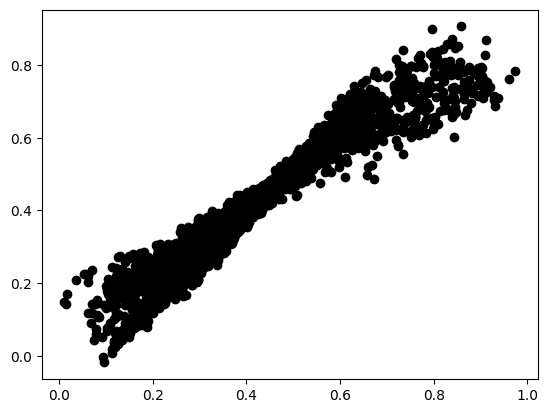

In [ ]:
plt.scatter(y_test,y_pred,color='black')
plt.show()

Plotting the graph for linear regression.

# Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

Fitting the decision tree regression model.

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtr.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


R^2 score on train set for decision tree regression.

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtr.score(X_test, y_test)))
dr= dtr.score(X_test, y_test)

Coefficient of determination R^2 <-- on train set: 0.996750606174823


R^2 score on test set for decision tree regression.

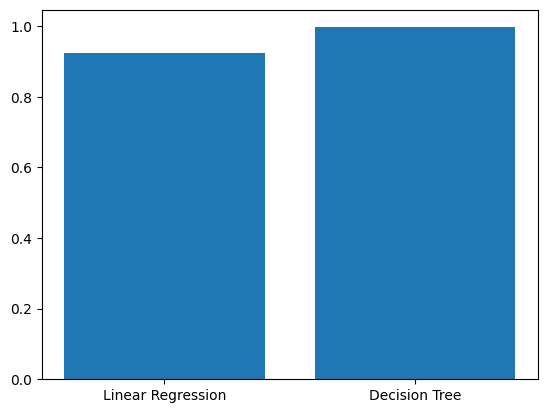

In [ ]:
from statistics import mean, stdev
import matplotlib.pyplot as plt
LR=[Linear]
DT=[dr]
RF_mean = mean(LR)
ABRF_mean = mean(DT)
plt.bar(['Linear Regression','Decision Tree'],[RF_mean,ABRF_mean])

plt.show()